In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")
#word_vectors = api.load('word2vec-google-news-300')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [4]:
word_vectors['king'].shape

(100,)

In [6]:
word_vectors['king']


array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [7]:
word_vectors.most_similar('king')

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977891325950623),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811409592628479),
 ('father', 0.680202841758728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074862480164)]

In [8]:
# Words to visualize
words = ["king", "princess", "monarch", "throne", "crown", "mountain", "ocean", "tv", "rainbow", "cloud", "queen"]

# Get word vector
vectors = np.array([word_vectors[word] for word in words])

In [9]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

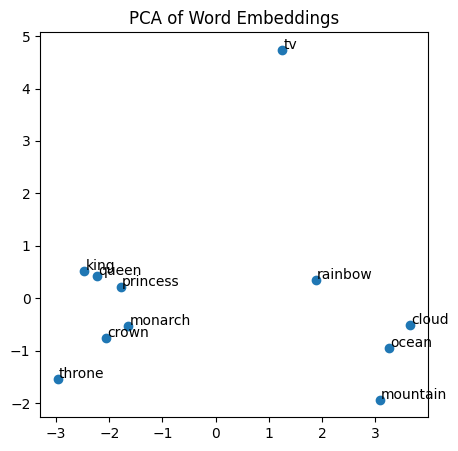

In [10]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, word in enumerate(words):
    axes.annotate(word, (vectors_pca[i, 0] + .02, vectors_pca[i, 1] + .02))
axes.set_title("PCA of Word Embeddings")
plt.show()

In [14]:
result = word_vectors.most_similar(positive=["king", "woman"], negative=["man"])
print(f"""
The word closest to 'king' - 'man' + 'woman' is: '{result[0][0]}'
with a similarity score of {result[0][1]}""")


The word closest to 'king' - 'man' + 'woman' is: 'queen'
with a similarity score of 0.7698540091514587


In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :] # +1 to remove [CLS] token
    return word_embedding

In [16]:
sentence1 = "The bat flew out of the cave at night."
sentence2 = "He swung the bat and hit a home run."

word = "bat"

bert_embedding1 = get_bert_embeddings(sentence1, word).detach().numpy()
bert_embedding2 = get_bert_embeddings(sentence2, word).detach().numpy()
word_embedding = word_vectors[word]

In [18]:
print("BERT embedding for 'bat' in sentence 1:", bert_embedding1)
print("BERT embedding for 'bat' in sentence 2:", bert_embedding2)
print("GloVe embedding for 'bat':", word_embedding)

bert_similarity = cosine_similarity([bert_embedding1], [bert_embedding2])
word_embedding_similarity = cosine_similarity([word_embedding], [word_embedding])

print()
print(f"Cosine similarity between BERT embedding in different context: {bert_similarity[0][0]}")
print(f"Cosine similarity between GloVe embedding in same context: {word_embedding_similarity[0][0]}")

BERT embedding for 'bat' in sentence 1: [ 4.13161248e-01 -1.29081830e-01 -4.48657393e-01 -4.04926747e-01
 -1.53057143e-01 -2.78137863e-01  5.19288957e-01  1.32697833e+00
  8.37713540e-01 -8.73302400e-01  4.37874258e-01 -5.33935785e-01
 -2.88685441e-01  5.52522540e-01 -7.83519506e-01 -4.17014599e-01
  4.75097775e-01  6.28552511e-02 -5.70206761e-01 -1.67948529e-01
  4.46243614e-01 -3.54403168e-01  8.56308714e-02 -5.00467300e-01
  3.32080454e-01 -2.67047971e-01 -2.42139339e-01  1.03990519e+00
 -7.01031834e-02 -3.22732270e-01 -5.41911185e-01 -3.31707418e-01
  1.09254017e-01 -3.95513564e-01 -7.90241480e-01  2.48389319e-01
  1.83021903e-01 -3.16271067e-01 -8.12134564e-01 -6.70362055e-01
  6.26333952e-01 -3.73581320e-01  1.31090686e-01  5.10260940e-01
  1.17004946e-01  3.32126319e-02 -3.93136203e-01 -4.38964516e-01
  9.36331570e-01 -4.48059082e-01  1.56909712e-02  1.23725533e+00
 -5.99466205e-01  5.18026948e-01 -1.15016811e-02  8.61964822e-01
  5.26215993e-02 -2.73106843e-01  5.47585636e-02  

### Cross-Encoders
A cross-encoder is a type of model used in natural language processing (NLP) to evaluate the relationship between two pieces of text. Unlike bi-encoders, which generate embeddings for each text independently, cross-encoders process both texts together, allowing them to capture more detailed interactions and relationships between the texts12.

Cross-encoders are particularly useful for tasks like sentence pair classification and ranking, where understanding the nuanced relationship between two texts is crucial3. However, they are computationally more expensive and less scalable compared to bi-encoders

Cross-encoders are typically not used to generate embeddings directly. Instead, they are used to evaluate the relationship between pairs of texts by processing them together.

In [19]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', max_length=512, default_activation_function=torch.nn.Sigmoid())

In [20]:
question = "Where is the capital of France?"

answers = [
    "Paris is the capital of France.",
    "Berlin is the capital of Germany.",
    "Madrid is the capital of Spain."
]

In [22]:
scores = model.predict([(question, answer) for answer in answers])
print(scores)
most_relevant_idx = torch.argmax(torch.tensor(scores)).item()
print(f"The most relevant passage is: {answers[most_relevant_idx]}")

[0.99965715 0.05289616 0.04520693]
The most relevant passage is: Paris is the capital of France.


- **Input Embeddings**: Token + Positional embeddings for each token
- **Contextual Embeddings**: Embedding after each layer